In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

import sys
sys.path.append('/Users/john/Quant-Project/quant/backtest/')
from metric import Metric

In [9]:
data = yf.download('SPY TLT', start='2002-07-30')['Adj Close']
data

[*********************100%***********************]  2 of 2 completed


,SPY,TLT
Date,,
2002-07-30 00:00:00-04:00,61.380989,41.236389
2002-07-31 00:00:00-04:00,61.529438,41.747295
2002-08-01 00:00:00-04:00,59.923031,41.985069
2002-08-02 00:00:00-04:00,58.579876,42.415001
2002-08-05 00:00:00-04:00,56.541485,42.602173
...,...,...
2023-01-23 00:00:00-05:00,400.630005,105.699997
2023-01-24 00:00:00-05:00,400.200012,107.220001
2023-01-25 00:00:00-05:00,400.350006,107.480003


In [10]:
returns = data.sum(axis=1).pct_change().fillna(0)
returns

Date
2002-07-30 00:00:00-04:00    0.000000
2002-07-31 00:00:00-04:00    0.006425
2002-08-01 00:00:00-04:00   -0.013252
2002-08-02 00:00:00-04:00   -0.008961
2002-08-05 00:00:00-04:00   -0.018330
                               ...   
2023-01-23 00:00:00-05:00    0.008465
2023-01-24 00:00:00-05:00    0.002153
2023-01-25 00:00:00-05:00    0.000808
2023-01-26 00:00:00-05:00    0.007680
2023-01-27 00:00:00-05:00    0.001290
Length: 5161, dtype: float64

In [11]:
test = Metric(data)
print(test.sharp_ratio())
print(test.sharp_ratio(returns))

0.38129351696011093
0.38129351696011093


In [12]:
test.print_report()

Annualized Return: 8.17%
Annualized Volatility: 10.93%
Skewness: -0.25
Kurtosis: 8.99
Max Drawdown: -28.73%
Max Drawdown Duration: 1202 days
Annualized Sharp Ratio: 0.38
Annualized Sortino Ratio: -0.35
Annualized Calmar Ratio: 0.28
Annualized VaR: -0.02
Annualized VaR Ratio: 0.02
Annualized CVaR: -0.03
Annualized CVaR Ratio: 0.01
Annualized hit Ratio: 0.55
Annualized GtP Ratio: 0.93


In [13]:
report = test.rolling_metric()
report

,dd,ddur,sharp,sortino,calmar,VaR_ratio,CVaR_ratio,hit,GtP
Date,,,,,,,,,
2002-07-30 00:00:00-04:00,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-31 00:00:00-04:00,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-01 00:00:00-04:00,-0.013252,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-02 00:00:00-04:00,-0.022095,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-05 00:00:00-04:00,-0.040019,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,-0.176829,391,-0.828643,-0.381022,-0.474706,-0.013735,-0.012930,0.468254,1.037363
2023-01-24 00:00:00-05:00,-0.175057,392,-0.766394,-0.368615,-0.426628,-0.012010,-0.011306,0.472222,1.032323
2023-01-25 00:00:00-05:00,-0.174390,393,-0.768096,-0.368950,-0.427907,-0.012056,-0.011350,0.472222,1.031998


In [ ]:
test.plot_report()

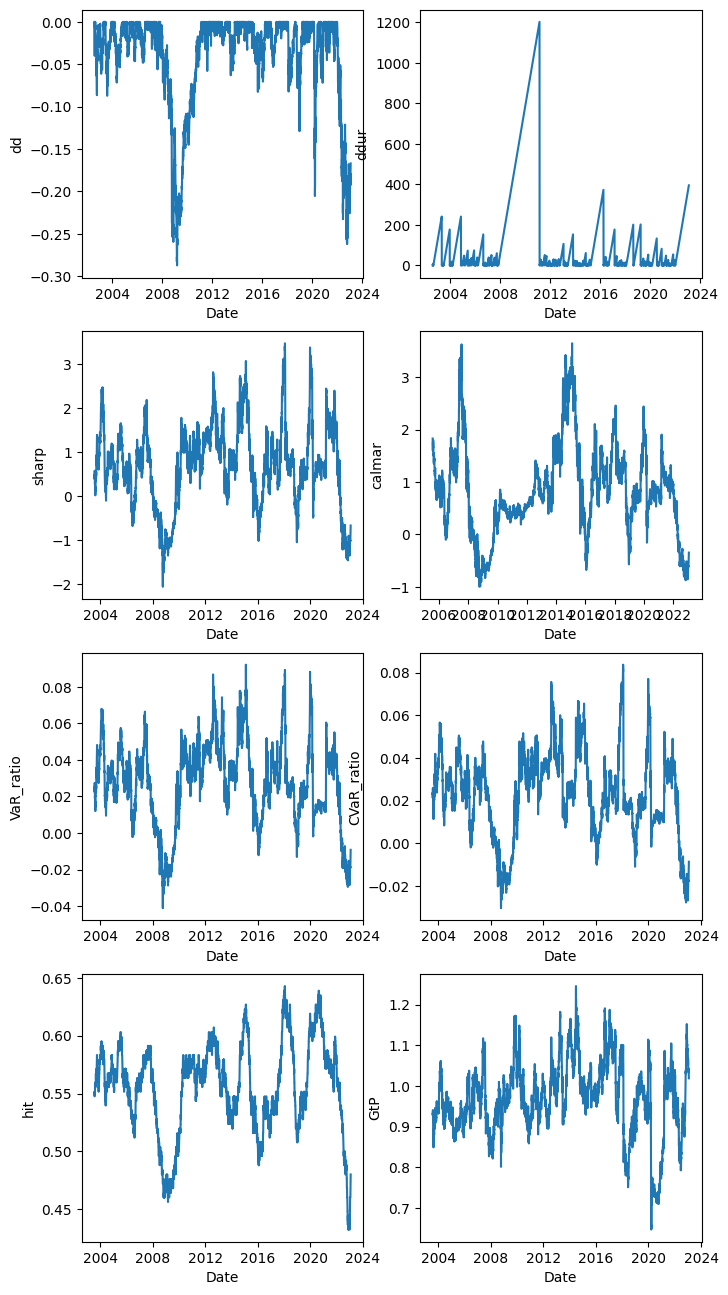

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(4, 2, figsize=(8, 16))
sns.lineplot(data=report, x='Date', y='dd', ax=ax[0][0])
sns.lineplot(data=report, x='Date', y='ddur', ax=ax[0][1])
sns.lineplot(data=report, x='Date', y='sharp', ax=ax[1][0])
sns.lineplot(data=report, x='Date', y='calmar', ax=ax[1][1])
sns.lineplot(data=report, x='Date', y='VaR_ratio', ax=ax[2][0])
sns.lineplot(data=report, x='Date', y='CVaR_ratio', ax=ax[2][1])
sns.lineplot(data=report, x='Date', y='hit', ax=ax[3][0])
sns.lineplot(data=report, x='Date', y='GtP', ax=ax[3][1])
plt.show()

In [9]:
print(test.annualized_return())
print(returns.mean() * 252)

-0.28727921284184943
0.08135378370921154
0.08420676751034899


In [10]:
print(test.annualized_volatility())
print(returns.std() * np.sqrt(252))

0.10932116390423675
0.10932116390423675


In [12]:
data.columns

MultiIndex([('Adj Close', 'SPY'),
            ('Adj Close', 'TLT'),
            (    'Close', 'SPY'),
            (    'Close', 'TLT'),
            (     'High', 'SPY'),
            (     'High', 'TLT'),
            (      'Low', 'SPY'),
            (      'Low', 'TLT'),
            (     'Open', 'SPY'),
            (     'Open', 'TLT'),
            (   'Volume', 'SPY'),
            (   'Volume', 'TLT')],
           )

In [3]:
samsung = yf.Ticker('005930.KS')

In [4]:
samsung_stock = samsung.history()
samsung_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-20 00:00:00+09:00,59000.0,59100.0,58500.0,58600.0,9284761,0.0,0.0
2022-12-21 00:00:00+09:00,58700.0,59100.0,58000.0,58000.0,10356971,0.0,0.0
2022-12-22 00:00:00+09:00,58100.0,59100.0,58100.0,59100.0,10720630,0.0,0.0
2022-12-23 00:00:00+09:00,58200.0,58400.0,57700.0,58100.0,9829407,0.0,0.0
2022-12-26 00:00:00+09:00,58000.0,58100.0,57700.0,57900.0,6756411,0.0,0.0
2022-12-27 00:00:00+09:00,58000.0,58400.0,57900.0,58100.0,10667027,0.0,0.0
2022-12-28 00:00:00+09:00,57600.0,57600.0,56400.0,56600.0,14665410,0.0,0.0
2022-12-29 00:00:00+09:00,56000.0,56200.0,55300.0,55300.0,11295935,0.0,0.0
2023-01-02 00:00:00+09:00,55500.0,56100.0,55200.0,55500.0,10031448,0.0,0.0


In [29]:
rets = samsung_stock['Close'].pct_change().fillna(0)
cum_rets = (1 + rets).cumprod()
cum_rets

Date
2022-12-20 00:00:00+09:00    1.000000
2022-12-21 00:00:00+09:00    0.989761
2022-12-22 00:00:00+09:00    1.008532
2022-12-23 00:00:00+09:00    0.991468
2022-12-26 00:00:00+09:00    0.988055
2022-12-27 00:00:00+09:00    0.991468
2022-12-28 00:00:00+09:00    0.965870
2022-12-29 00:00:00+09:00    0.943686
2023-01-02 00:00:00+09:00    0.947099
2023-01-03 00:00:00+09:00    0.945392
2023-01-04 00:00:00+09:00    0.986348
2023-01-05 00:00:00+09:00    0.993174
2023-01-06 00:00:00+09:00    1.006826
2023-01-09 00:00:00+09:00    1.035836
2023-01-10 00:00:00+09:00    1.030717
2023-01-11 00:00:00+09:00    1.032423
2023-01-12 00:00:00+09:00    1.032423
2023-01-13 00:00:00+09:00    1.037543
2023-01-16 00:00:00+09:00    1.042662
2023-01-17 00:00:00+09:00    1.040956
2023-01-18 00:00:00+09:00    1.030717
2023-01-19 00:00:00+09:00    1.049488
2023-01-20 00:00:00+09:00    1.054608
Name: Close, dtype: float64

In [67]:
rets.skew()

0.607896711588878

In [21]:
dd = samsung_stock['Close'].div(samsung_stock['Close'].cummax()).sub(1)
dd

Date
2022-12-20 00:00:00+09:00    0.000000
2022-12-21 00:00:00+09:00   -0.010239
2022-12-22 00:00:00+09:00    0.000000
2022-12-23 00:00:00+09:00   -0.016920
2022-12-26 00:00:00+09:00   -0.020305
2022-12-27 00:00:00+09:00   -0.016920
2022-12-28 00:00:00+09:00   -0.042301
2022-12-29 00:00:00+09:00   -0.064298
2023-01-02 00:00:00+09:00   -0.060914
2023-01-03 00:00:00+09:00   -0.062606
2023-01-04 00:00:00+09:00   -0.021997
2023-01-05 00:00:00+09:00   -0.015228
2023-01-06 00:00:00+09:00   -0.001692
2023-01-09 00:00:00+09:00    0.000000
2023-01-10 00:00:00+09:00   -0.004942
2023-01-11 00:00:00+09:00   -0.003295
2023-01-12 00:00:00+09:00   -0.003295
2023-01-13 00:00:00+09:00    0.000000
2023-01-16 00:00:00+09:00    0.000000
2023-01-17 00:00:00+09:00   -0.001637
2023-01-18 00:00:00+09:00   -0.011457
2023-01-19 00:00:00+09:00    0.000000
2023-01-20 00:00:00+09:00    0.000000
Name: Close, dtype: float64

In [30]:
cum_rets.div(cum_rets.cummax()).sub(1)

Date
2022-12-20 00:00:00+09:00    0.000000
2022-12-21 00:00:00+09:00   -0.010239
2022-12-22 00:00:00+09:00    0.000000
2022-12-23 00:00:00+09:00   -0.016920
2022-12-26 00:00:00+09:00   -0.020305
2022-12-27 00:00:00+09:00   -0.016920
2022-12-28 00:00:00+09:00   -0.042301
2022-12-29 00:00:00+09:00   -0.064298
2023-01-02 00:00:00+09:00   -0.060914
2023-01-03 00:00:00+09:00   -0.062606
2023-01-04 00:00:00+09:00   -0.021997
2023-01-05 00:00:00+09:00   -0.015228
2023-01-06 00:00:00+09:00   -0.001692
2023-01-09 00:00:00+09:00    0.000000
2023-01-10 00:00:00+09:00   -0.004942
2023-01-11 00:00:00+09:00   -0.003295
2023-01-12 00:00:00+09:00   -0.003295
2023-01-13 00:00:00+09:00    0.000000
2023-01-16 00:00:00+09:00    0.000000
2023-01-17 00:00:00+09:00   -0.001637
2023-01-18 00:00:00+09:00   -0.011457
2023-01-19 00:00:00+09:00    0.000000
2023-01-20 00:00:00+09:00    0.000000
Name: Close, dtype: float64

In [33]:
from itertools import groupby, chain

ddur_idx = list(chain.from_iterable((np.arange(len(list(j))) + 1).tolist() if i==1 else [0] * len(list(j)) for i, j in groupby(dd != 0)))
ddur_idx = pd.Series(ddur_idx, index=dd.index)
ddur_idx

Date
2022-12-20 00:00:00+09:00     0
2022-12-21 00:00:00+09:00     1
2022-12-22 00:00:00+09:00     0
2022-12-23 00:00:00+09:00     1
2022-12-26 00:00:00+09:00     2
2022-12-27 00:00:00+09:00     3
2022-12-28 00:00:00+09:00     4
2022-12-29 00:00:00+09:00     5
2023-01-02 00:00:00+09:00     6
2023-01-03 00:00:00+09:00     7
2023-01-04 00:00:00+09:00     8
2023-01-05 00:00:00+09:00     9
2023-01-06 00:00:00+09:00    10
2023-01-09 00:00:00+09:00     0
2023-01-10 00:00:00+09:00     1
2023-01-11 00:00:00+09:00     2
2023-01-12 00:00:00+09:00     3
2023-01-13 00:00:00+09:00     0
2023-01-16 00:00:00+09:00     0
2023-01-17 00:00:00+09:00     1
2023-01-18 00:00:00+09:00     2
2023-01-19 00:00:00+09:00     0
2023-01-20 00:00:00+09:00     0
dtype: int64

In [59]:
temp_df = ddur_idx.reset_index()
temp_df.columns = ['date', 'rows']
temp_df

,date,rows
0,2022-12-20 00:00:00+09:00,0
1,2022-12-21 00:00:00+09:00,1
2,2022-12-22 00:00:00+09:00,0
3,2022-12-23 00:00:00+09:00,1
4,2022-12-26 00:00:00+09:00,2
5,2022-12-27 00:00:00+09:00,3
6,2022-12-28 00:00:00+09:00,4
7,2022-12-29 00:00:00+09:00,5
8,2023-01-02 00:00:00+09:00,6
9,2023-01-03 00:00:00+09:00,7


In [62]:
rows_0 = temp_df.rows.apply(lambda x: 0 if x > 0 else 1)
cumdays = temp_df.date.diff().dt.days.fillna(0).astype(int).cumsum()
ddur = cumdays - (rows_0 * cumdays).replace(0, np.nan).ffill().fillna(0).astype(int)
ddur.index = dd.index
ddur

Date
2022-12-20 00:00:00+09:00     0
2022-12-21 00:00:00+09:00     1
2022-12-22 00:00:00+09:00     0
2022-12-23 00:00:00+09:00     1
2022-12-26 00:00:00+09:00     4
2022-12-27 00:00:00+09:00     5
2022-12-28 00:00:00+09:00     6
2022-12-29 00:00:00+09:00     7
2023-01-02 00:00:00+09:00    11
2023-01-03 00:00:00+09:00    12
2023-01-04 00:00:00+09:00    13
2023-01-05 00:00:00+09:00    14
2023-01-06 00:00:00+09:00    15
2023-01-09 00:00:00+09:00     0
2023-01-10 00:00:00+09:00     1
2023-01-11 00:00:00+09:00     2
2023-01-12 00:00:00+09:00     3
2023-01-13 00:00:00+09:00     0
2023-01-16 00:00:00+09:00     0
2023-01-17 00:00:00+09:00     1
2023-01-18 00:00:00+09:00     2
2023-01-19 00:00:00+09:00     0
2023-01-20 00:00:00+09:00     0
dtype: int64

In [64]:
from itertools import groupby, chain

ddur_count = list(chain.from_iterable((np.arange(len(list(j))) + 1).tolist() if i==1 else [0] * len(list(j)) for i, j in groupby(dd != 0)))
ddur_count = pd.Series(ddur_count, index=dd.index)
temp_df= ddur_count.reset_index()
temp_df.columns = ['date', 'counts']
count_0 = temp_df.counts.apply(lambda x: 0 if x > 0 else 1)
cumdays = temp_df.date.diff().dt.days.fillna(0).astype(int).cumsum()
ddur = cumdays - (count_0 * cumdays).replace(0, np.nan).ffill().fillna(0).astype(int)
ddur.index = dd.index
ddur

Date
2022-12-20 00:00:00+09:00     0
2022-12-21 00:00:00+09:00     1
2022-12-22 00:00:00+09:00     0
2022-12-23 00:00:00+09:00     1
2022-12-26 00:00:00+09:00     4
2022-12-27 00:00:00+09:00     5
2022-12-28 00:00:00+09:00     6
2022-12-29 00:00:00+09:00     7
2023-01-02 00:00:00+09:00    11
2023-01-03 00:00:00+09:00    12
2023-01-04 00:00:00+09:00    13
2023-01-05 00:00:00+09:00    14
2023-01-06 00:00:00+09:00    15
2023-01-09 00:00:00+09:00     0
2023-01-10 00:00:00+09:00     1
2023-01-11 00:00:00+09:00     2
2023-01-12 00:00:00+09:00     3
2023-01-13 00:00:00+09:00     0
2023-01-16 00:00:00+09:00     0
2023-01-17 00:00:00+09:00     1
2023-01-18 00:00:00+09:00     2
2023-01-19 00:00:00+09:00     0
2023-01-20 00:00:00+09:00     0
dtype: int64

In [25]:
ddur.max()

10

In [24]:
rets = samsung_stock['Close'].pct_change().fillna(0)
rets

Date
2022-12-20 00:00:00+09:00    0.000000
2022-12-21 00:00:00+09:00   -0.010239
2022-12-22 00:00:00+09:00    0.018966
2022-12-23 00:00:00+09:00   -0.016920
2022-12-26 00:00:00+09:00   -0.003442
2022-12-27 00:00:00+09:00    0.003454
2022-12-28 00:00:00+09:00   -0.025818
2022-12-29 00:00:00+09:00   -0.022968
2023-01-02 00:00:00+09:00    0.003617
2023-01-03 00:00:00+09:00   -0.001802
2023-01-04 00:00:00+09:00    0.043321
2023-01-05 00:00:00+09:00    0.006920
2023-01-06 00:00:00+09:00    0.013746
2023-01-09 00:00:00+09:00    0.028814
2023-01-10 00:00:00+09:00   -0.004942
2023-01-11 00:00:00+09:00    0.001656
2023-01-12 00:00:00+09:00    0.000000
2023-01-13 00:00:00+09:00    0.004959
2023-01-16 00:00:00+09:00    0.004934
2023-01-17 00:00:00+09:00   -0.001637
2023-01-18 00:00:00+09:00   -0.009836
2023-01-19 00:00:00+09:00    0.018212
2023-01-20 00:00:00+09:00    0.004878
Name: Close, dtype: float64

In [15]:
samsung.history(period='1mo', interval='5m')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-12-06 09:00:00+09:00,59800.0,59900.0,59300.0,59500.0,0,0.0,0.0
2022-12-06 09:05:00+09:00,59500.0,59800.0,59300.0,59800.0,593964,0.0,0.0
2022-12-06 09:10:00+09:00,59800.0,60000.0,59700.0,59900.0,313825,0.0,0.0
2022-12-06 09:15:00+09:00,59900.0,60000.0,59800.0,59900.0,180089,0.0,0.0
2022-12-06 09:20:00+09:00,59900.0,59900.0,59800.0,59900.0,81129,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-05 14:40:00+09:00,58000.0,58100.0,57900.0,58000.0,127340,0.0,0.0
2023-01-05 14:45:00+09:00,58000.0,58000.0,57900.0,58000.0,32969,0.0,0.0
2023-01-05 14:50:00+09:00,57900.0,58000.0,57900.0,58000.0,39043,0.0,0.0


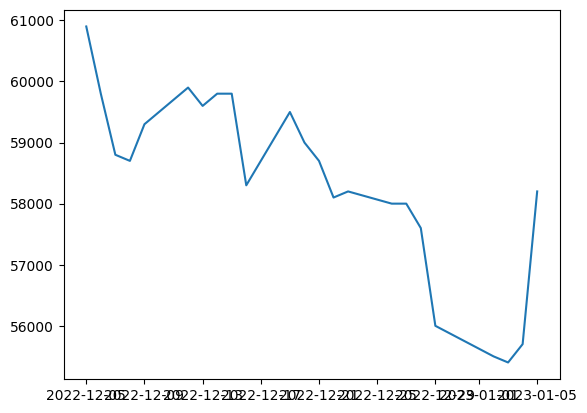

In [16]:
plt.plot(samsung_stock['Open'])

In [10]:
type(samsung_stock.columns)

pandas.core.indexes.base.Index

In [ ]:
annualize_scale_dict = {
    'daily': 252,
    'weekly': 52,
    'monthly': 12,
    'quarterly': 4
}

In [17]:
samsung_stock['Open'].mean()

58382.608695652176

In [18]:
risky_asset = ['GOOGL', 'KO', 'HD', 'INTU', 'PEP', 'NOW', 'TSLA', 'UNH']
bond_asset = ["SHV", "IEF", "TLT", 'IAU', 'SLV', 'VNQ']
canary_asset = ["VWO", "BND"]
#econ_ind = ['UNRATE', 'SP500']
all_tickers = risky_asset + bond_asset + canary_asset

In [20]:
def get_price_info(all_tickers): 
    temp = []
    for ticker in all_tickers : 
        target_df = pd.DataFrame(yf.download(ticker))["Adj Close"]
        temp.append(target_df)

    price_df = pd.concat(temp, axis = 1)
    price_df.columns = all_tickers

    return price_df

In [29]:
#econ_df = econ_info(econ_ind)
all_ticker_df = get_price_info(all_tickers)
#all_ticker_df = pd.concat([all_price_df, econ_df], axis = 1)

all_ticker_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
Date,,,,,,,,,,,,,,,,
1962-01-02,NaN,0.049664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,0.048557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,0.048926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,0.047820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,0.047328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,86.019997,63.570000,315.730011,376.500000,181.750000,376.049988,112.709999,528.450012,109.870003,95.709999,99.550003,34.220001,21.600000,81.300003,38.790001,71.870003
2022-12-29,88.449997,63.950001,320.410004,390.869995,181.979996,389.850006,121.820000,529.880005,109.930000,96.180000,100.680000,34.439999,21.969999,83.080002,39.459999,72.139999
2022-12-30,88.230003,63.610001,315.859985,389.220001,180.660004,388.269989,123.180000,530.179993,109.919998,95.779999,99.559998,34.590000,22.020000,82.480003,38.980000,71.839996


In [32]:
scale = 252
all_ticker_df = all_ticker_df.dropna()

all_ticker_df['CASH'] = 0.04/scale
all_ticker_df['CASH'] = (1 + all_ticker_df['CASH']).cumprod()
all_ticker_df.index.name = "datetime"
all_ticker_df

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND,CASH
datetime,,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.154280,41.959530,53.893169,52.216080,24.600000,2.086000,49.762321,102.687904,89.848282,97.563110,31.120001,26.650000,43.129211,29.418514,64.217339,1.000159
2012-07-02,14.526276,28.417126,41.975368,54.192837,52.289967,24.770000,2.026667,47.856880,102.678528,90.265182,98.569756,31.120001,26.730000,43.603802,29.447987,64.352348,1.000317
2012-07-03,14.710460,28.503548,40.898468,54.619625,52.289967,25.309999,2.044000,46.683002,102.687904,90.040085,97.812263,31.600000,27.490000,43.860889,29.985819,64.260857,1.000476
2012-07-05,14.912913,28.247894,41.262714,54.410763,51.853966,25.959999,2.082000,47.474106,102.678528,90.281853,98.312042,31.260000,26.879999,43.590641,29.727966,64.443863,1.000635
2012-07-06,14.664164,28.139883,41.294392,52.708439,51.890911,25.840000,2.066000,47.482609,102.687904,90.598701,99.225769,30.840000,26.299999,43.696106,29.190125,64.504890,1.000794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,86.019997,63.570000,315.730011,376.500000,181.750000,376.049988,112.709999,528.450012,109.870003,95.709999,99.550003,34.220001,21.600000,81.300003,38.790001,71.870003,1.520945
2022-12-29,88.449997,63.950001,320.410004,390.869995,181.979996,389.850006,121.820000,529.880005,109.930000,96.180000,100.680000,34.439999,21.969999,83.080002,39.459999,72.139999,1.521186
2022-12-30,88.230003,63.610001,315.859985,389.220001,180.660004,388.269989,123.180000,530.179993,109.919998,95.779999,99.559998,34.590000,22.020000,82.480003,38.980000,71.839996,1.521428


In [35]:
all_ticker_df.index

DatetimeIndex(['2012-06-29', '2012-07-02', '2012-07-03', '2012-07-05',
               '2012-07-06', '2012-07-09', '2012-07-10', '2012-07-11',
               '2012-07-12', '2012-07-13',
               ...
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2023-01-03', '2023-01-04'],
              dtype='datetime64[ns]', name='datetime', length=2646, freq=None)

In [38]:
rolling = all_ticker_df.rolling(252)

In [41]:
rolling.mean()

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND,CASH
datetime,,,,,,,,,,,,,,,,,
2012-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,115.340796,60.622525,307.122592,440.041771,169.285513,471.835040,265.327249,506.361105,108.919676,101.737437,115.941975,34.212421,20.076945,93.225291,41.307121,75.081509,1.491048
2022-12-29,115.109823,60.649088,306.803753,439.036880,169.339152,470.784524,264.373902,506.482902,108.923759,101.672108,115.772861,34.212857,20.080357,93.114305,41.277026,75.040336,1.491285
2022-12-30,114.879782,60.674957,306.470342,438.043861,169.388713,469.727898,263.446918,506.610396,108.927803,101.603711,115.594533,34.212937,20.083056,92.999025,41.242624,74.997237,1.491522


In [ ]:
def price_on_rebal(price_df: pd.DataFrame, rebal_dates: list) -> pd.DataFrame:
    '''
    기능: 리밸런싱 날의 가격을 갖고 있는 df
    price_df: get_price()의 결과값
    rebal_dates: rebal_dates의 결과값
    '''
    price_on_rebal = price_df.loc[rebal_dates, :]
    return price_on_rebal

In [53]:
def get_price(tickers: list, period: str, interval: str, start_date: str=None) -> pd.DataFrame:
    '''
    기능: interval 가격 정보를 받는다.
    period, interval: 분 단위 정보 -> 회정 자산배분을 위해 필요
    interval 변수: (1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo)
    '''
    temp = []
    for ticker in tickers:
        name = f'{ticker}'
        name = yf.Ticker(ticker)
        temp_df = name.history(start=start_date, period=period, interval=interval)['Close']
        temp.append(temp_df)
    
    price_df = pd.concat(temp, axis = 1)
    price_df.columns = all_tickers
    
    if interval in ['1d', '5d', '1wk', '1mo', '3mo']:
        price_df.index = price_df.index.date
        
    return price_df

In [54]:
risky_asset = ['GOOGL', 'KO', 'HD', 'INTU', 'PEP', 'NOW', 'TSLA', 'UNH']
bond_asset = ["SHV", "IEF", "TLT", 'IAU', 'SLV', 'VNQ']
canary_asset = ["VWO", "BND"]
all_tickers = risky_asset + bond_asset + canary_asset

all_ticker_df = get_price(all_tickers, 'max', '1d')

In [55]:
all_ticker_df

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
1962-01-02,NaN,0.049664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,0.048557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,0.048926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,0.047820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,0.047328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29,88.449997,63.950001,320.410004,390.869995,181.979996,389.850006,121.820000,529.880005,109.930000,96.180000,100.680000,34.439999,21.969999,83.080002,39.459999,72.139999
2022-12-30,88.230003,63.610001,315.859985,389.220001,180.660004,388.269989,123.180000,530.179993,109.919998,95.779999,99.559998,34.590000,22.020000,82.480003,38.980000,71.839996
2023-01-03,89.120003,62.950001,315.910004,391.179993,179.410004,385.500000,108.099998,518.640015,109.940002,96.529999,101.459999,34.880001,22.049999,82.559998,39.400002,72.220001
2023-01-04,88.080002,62.919998,319.730011,391.570007,178.970001,393.850006,113.639999,504.500000,109.949997,97.269997,102.849998,35.209999,21.889999,84.430000,40.419998,72.629997


In [ ]:
import yfinance as yf

tlsa_yf = yf.Ticker('TSLA')

In [2]:
apple = yf.Ticker('AAPL')
info_aapl = apple.info
info_aapl

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 164000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand rad

In [6]:
apple.get_balance_sheet(proxy="PROXY_SERVER")

,2022-09-30,2021-09-30,2020-09-30,2019-09-30
TotalAssets,352755000000.0,351002000000.0,323888000000.0,338516000000.0
CurrentAssets,135405000000.0,134836000000.0,143713000000.0,162819000000.0
CashCashEquivalentsAndShortTermInvestments,48304000000.0,62639000000.0,90943000000.0,100557000000.0
CashAndCashEquivalents,23646000000.0,34940000000.0,38016000000.0,48844000000.0
CashFinancial,18546000000.0,17305000000.0,17773000000.0,12204000000.0
CashEquivalents,5100000000.0,17635000000.0,20243000000.0,36640000000.0
OtherShortTermInvestments,24658000000.0,27699000000.0,52927000000.0,51713000000.0
Receivables,60932000000.0,51506000000.0,37445000000.0,45804000000.0
AccountsReceivable,28184000000.0,26278000000.0,16120000000.0,22926000000.0
OtherReceivables,32748000000.0,25228000000.0,21325000000.0,22878000000.0


In [8]:
temp_df = pd.DataFrame(np.random.randint(2, size=(100, 4)))
temp_df

,0,1,2,3
0,0,0,1,0
1,0,0,0,1
2,1,1,0,0
3,1,0,1,0
4,0,0,1,0
...,...,...,...,...
95,1,0,0,1
96,0,1,0,1
97,1,0,1,1
98,1,1,1,1


In [15]:
temp_df.shape[0]

100

In [13]:
temp_df.apply(lambda series: series / series.sum(), axis=1)

,0,1,2,3
0,0.000000,0.00,1.000000,0.000000
1,0.000000,0.00,0.000000,1.000000
2,0.500000,0.50,0.000000,0.000000
3,0.500000,0.00,0.500000,0.000000
4,0.000000,0.00,1.000000,0.000000
...,...,...,...,...
95,0.500000,0.00,0.000000,0.500000
96,0.000000,0.50,0.000000,0.500000
97,0.333333,0.00,0.333333,0.333333
98,0.250000,0.25,0.250000,0.250000
